# Homework 2

## Step 2: In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

### Load QMNIST dataset and preprocess

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', what='train', download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', what='test', download=True, transform=transform)

### Create data loaders

In [3]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### Iterating and Visualizing the Train Dataset

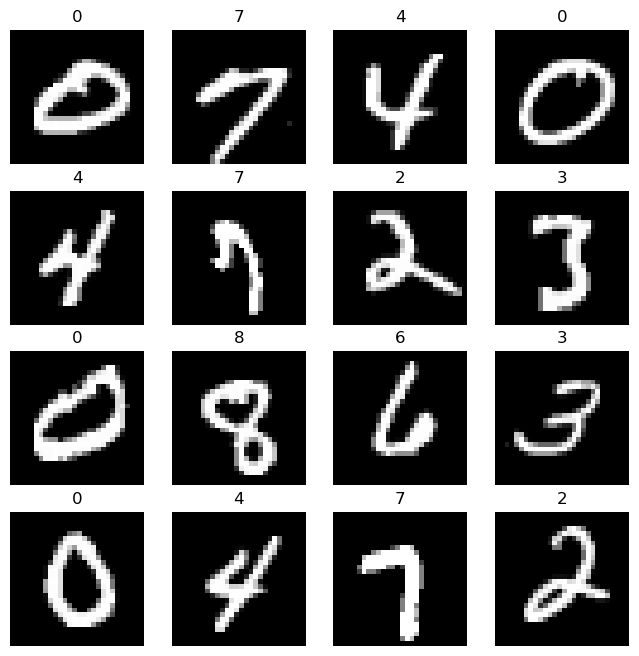

In [4]:
labels_map = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4",
    5: "5", 6: "6", 7: "7", 8: "8", 9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Iterating and Visualizing the Test Dataset

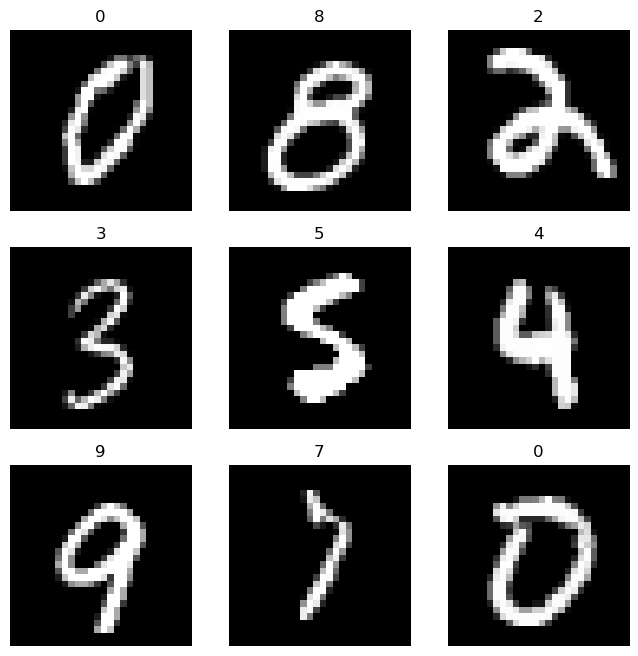

In [5]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Define the neural network architecture

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

### Define the loss function and optimizer and Train the neural network

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0166656377911567
Epoch 1, Batch 200, Loss: 0.43681683868169785
Epoch 1, Batch 300, Loss: 0.39420385152101517
Epoch 1, Batch 400, Loss: 0.33332599088549614
Epoch 1, Batch 500, Loss: 0.3116446176171303
Epoch 1, Batch 600, Loss: 0.30643653325736525
Epoch 1, Batch 700, Loss: 0.2888300002366304
Epoch 1, Batch 800, Loss: 0.26978753075003625
Epoch 1, Batch 900, Loss: 0.2571226159483194
Epoch 2, Batch 100, Loss: 0.22557723123580217
Epoch 2, Batch 200, Loss: 0.21340627819299698
Epoch 2, Batch 300, Loss: 0.2010527367889881
Epoch 2, Batch 400, Loss: 0.1652444490790367
Epoch 2, Batch 500, Loss: 0.2101515954732895
Epoch 2, Batch 600, Loss: 0.1841678548231721
Epoch 2, Batch 700, Loss: 0.1792697709053755
Epoch 2, Batch 800, Loss: 0.16437417205423116
Epoch 2, Batch 900, Loss: 0.16834905058145522
Epoch 3, Batch 100, Loss: 0.14787800639867782
Epoch 3, Batch 200, Loss: 0.142514253500849
Epoch 3, Batch 300, Loss: 0.13506748083978892
Epoch 3, Batch 400, Loss: 0.14635609688237308

### Evaluate on training dataset

In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total}%')

Accuracy on train set: 0.9793833333333334%


### Evaluate on test dataset

In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.96795%


### Predictions on Test dataset

In [10]:
model.eval()
predictions = []
actual_labels = []
actual_images = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        actual_labels.extend(labels)
        actual_images.extend(images)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

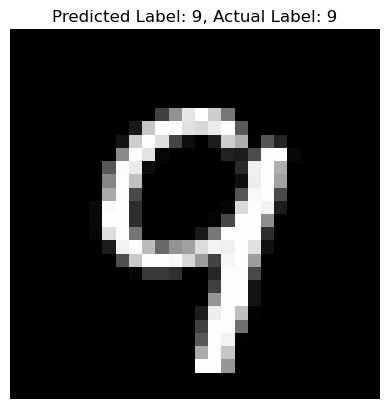

In [11]:
idx = 16
# Get one test image and its label
image, label = actual_images[idx], actual_labels[idx]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[idx]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

## Step 3: Report on the results in terms of prediction accuracy on the train and test datasets
#### Answer: The results after training and testing the model has a slight decrease in prediction accuracy  from 0.9793% (training set) to 0.96795% (testing set).

## Step 4: Choose one of the proposed modifications below:
####  - Add another Dense layer of 128 nodes
####   - Increase the current number of nodes in the layer to 256
#### Hypothesize how it would change the performance results

### I have chosen to add another Dense layer of 128 nodes

### Hypothesis: I think the prediction accuracy of both training and testing is going to slightly decrease as adding another layer is going to increases the model's complexity.

In [12]:

class ModifiedMLP(nn.Module):
    def __init__(self):
        super(ModifiedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the modified neural network
modified_model = ModifiedMLP()

### Step 5: Modify the model based on the chosen method and train

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    modified_model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = modified_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training with Modified Model')

Epoch 1, Batch 100, Loss: 1.120153324007988
Epoch 1, Batch 200, Loss: 0.4612406161427498
Epoch 1, Batch 300, Loss: 0.4040873119235039
Epoch 1, Batch 400, Loss: 0.34023728683590887
Epoch 1, Batch 500, Loss: 0.3324394644796848
Epoch 1, Batch 600, Loss: 0.29763034857809545
Epoch 1, Batch 700, Loss: 0.2572627130895853
Epoch 1, Batch 800, Loss: 0.2683930371701717
Epoch 1, Batch 900, Loss: 0.2539124780893326
Epoch 2, Batch 100, Loss: 0.23299632348120214
Epoch 2, Batch 200, Loss: 0.2064969676733017
Epoch 2, Batch 300, Loss: 0.20297368448227643
Epoch 2, Batch 400, Loss: 0.18352126535028218
Epoch 2, Batch 500, Loss: 0.16813378501683474
Epoch 2, Batch 600, Loss: 0.17479379825294017
Epoch 2, Batch 700, Loss: 0.18250354051589965
Epoch 2, Batch 800, Loss: 0.14517874725162982
Epoch 2, Batch 900, Loss: 0.15674235045909882
Epoch 3, Batch 100, Loss: 0.14120784999802707
Epoch 3, Batch 200, Loss: 0.12662156287580728
Epoch 3, Batch 300, Loss: 0.13653797280043364
Epoch 3, Batch 400, Loss: 0.133501908257603

In [14]:
# Evaluate the on train model
modified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = modified_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set with modified model: { correct / total}%')

Accuracy on train set with modified model: 0.9705166666666667%


In [15]:
# Evaluate the on test model
modified_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = modified_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set with modified model: { correct / total}%')

Accuracy on test set with modified model: 0.9604666666666667%


## Step 6: Report on the results of the modified model and check if it matches the hypothesis

### As we stated above, the prediction accuracy on both train and test decreased as we added another dense layer of 128 nodes.

In [16]:
# Evaluate the model and store predictions
modified_model.eval()
predictions = []
actual_labels = []
actual_images = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = modified_model(images)
        _, predicted = torch.max(outputs.data, 1)
        actual_labels.extend(labels)
        actual_images.extend(images)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

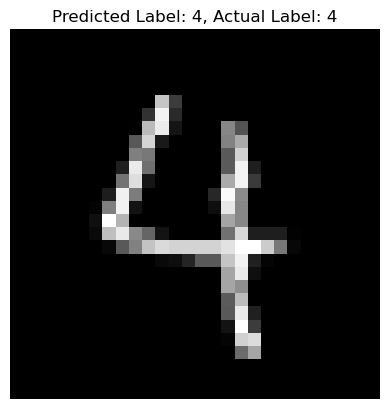

In [17]:
idx = 24
# Get one test image and its label
image, label = actual_images[idx], actual_labels[idx]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[idx]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

1. Optimizer used: SGD with momentum of 0.9
2. Loss Function changed to NLLLoss() as its suitable for multi-class classification tasks. 
3. Activation functions: Used tanh, leaky Relu and softmax.
4. Dropout: added a dropout of 0.5 after every layer

In [18]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
# Initialize the neural network
model = MLP()

In [19]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 2.1675568425655367
Epoch 1, Batch 200, Loss: 1.3259968596696854
Epoch 1, Batch 300, Loss: 0.9703645157814026
Epoch 1, Batch 400, Loss: 0.7943775829672813
Epoch 1, Batch 500, Loss: 0.7308182913064957
Epoch 1, Batch 600, Loss: 0.7169726738333702
Epoch 1, Batch 700, Loss: 0.6533309414982795
Epoch 1, Batch 800, Loss: 0.6154499763250351
Epoch 1, Batch 900, Loss: 0.5483930706977844
Epoch 2, Batch 100, Loss: 0.5572262901067734
Epoch 2, Batch 200, Loss: 0.5437280258536339
Epoch 2, Batch 300, Loss: 0.5159157353639603
Epoch 2, Batch 400, Loss: 0.5009066036343575
Epoch 2, Batch 500, Loss: 0.47320314198732377
Epoch 2, Batch 600, Loss: 0.47478583455085754
Epoch 2, Batch 700, Loss: 0.476227739751339
Epoch 2, Batch 800, Loss: 0.4766091394424439
Epoch 2, Batch 900, Loss: 0.49469599485397336
Epoch 3, Batch 100, Loss: 0.44899638250470164
Epoch 3, Batch 200, Loss: 0.44887139901518824
Epoch 3, Batch 300, Loss: 0.4150230959057808
Epoch 3, Batch 400, Loss: 0.424739615470171
Epoch 3

### Evaluate on training dataset

In [20]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total}%')

Accuracy on train set: 0.9461%


### Evaluate on test dataset

In [21]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9409833333333333%


### Predictions on test dataset

In [22]:
model.eval()
predictions = []
actual_labels = []
actual_images = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        actual_labels.extend(labels)
        actual_images.extend(images)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

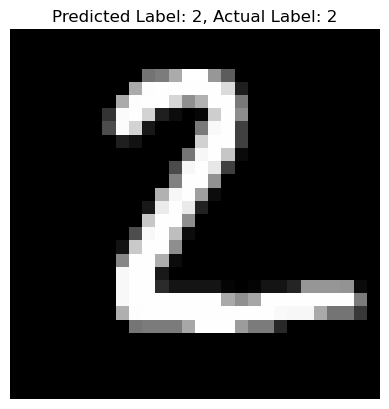

In [25]:
idx = 1
# Get one test image and its label
image, label = actual_images[idx], actual_labels[idx]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[idx]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

## Conclusion:
### I observed the change in performance as I tune these hyperparameters was that prediction accuracy further decreased to approx 94% for both training and testing sets

Reference:
    
https://pytorch.org/docs/master/nn.html#torch.nn.NLLLoss

https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

## Step 8. Show an example of a backpropagation algorithm by hand (one round of forward step and backward step on a smaller network by performing derivatives by hand instead of using coding libraries, you can use the reference video

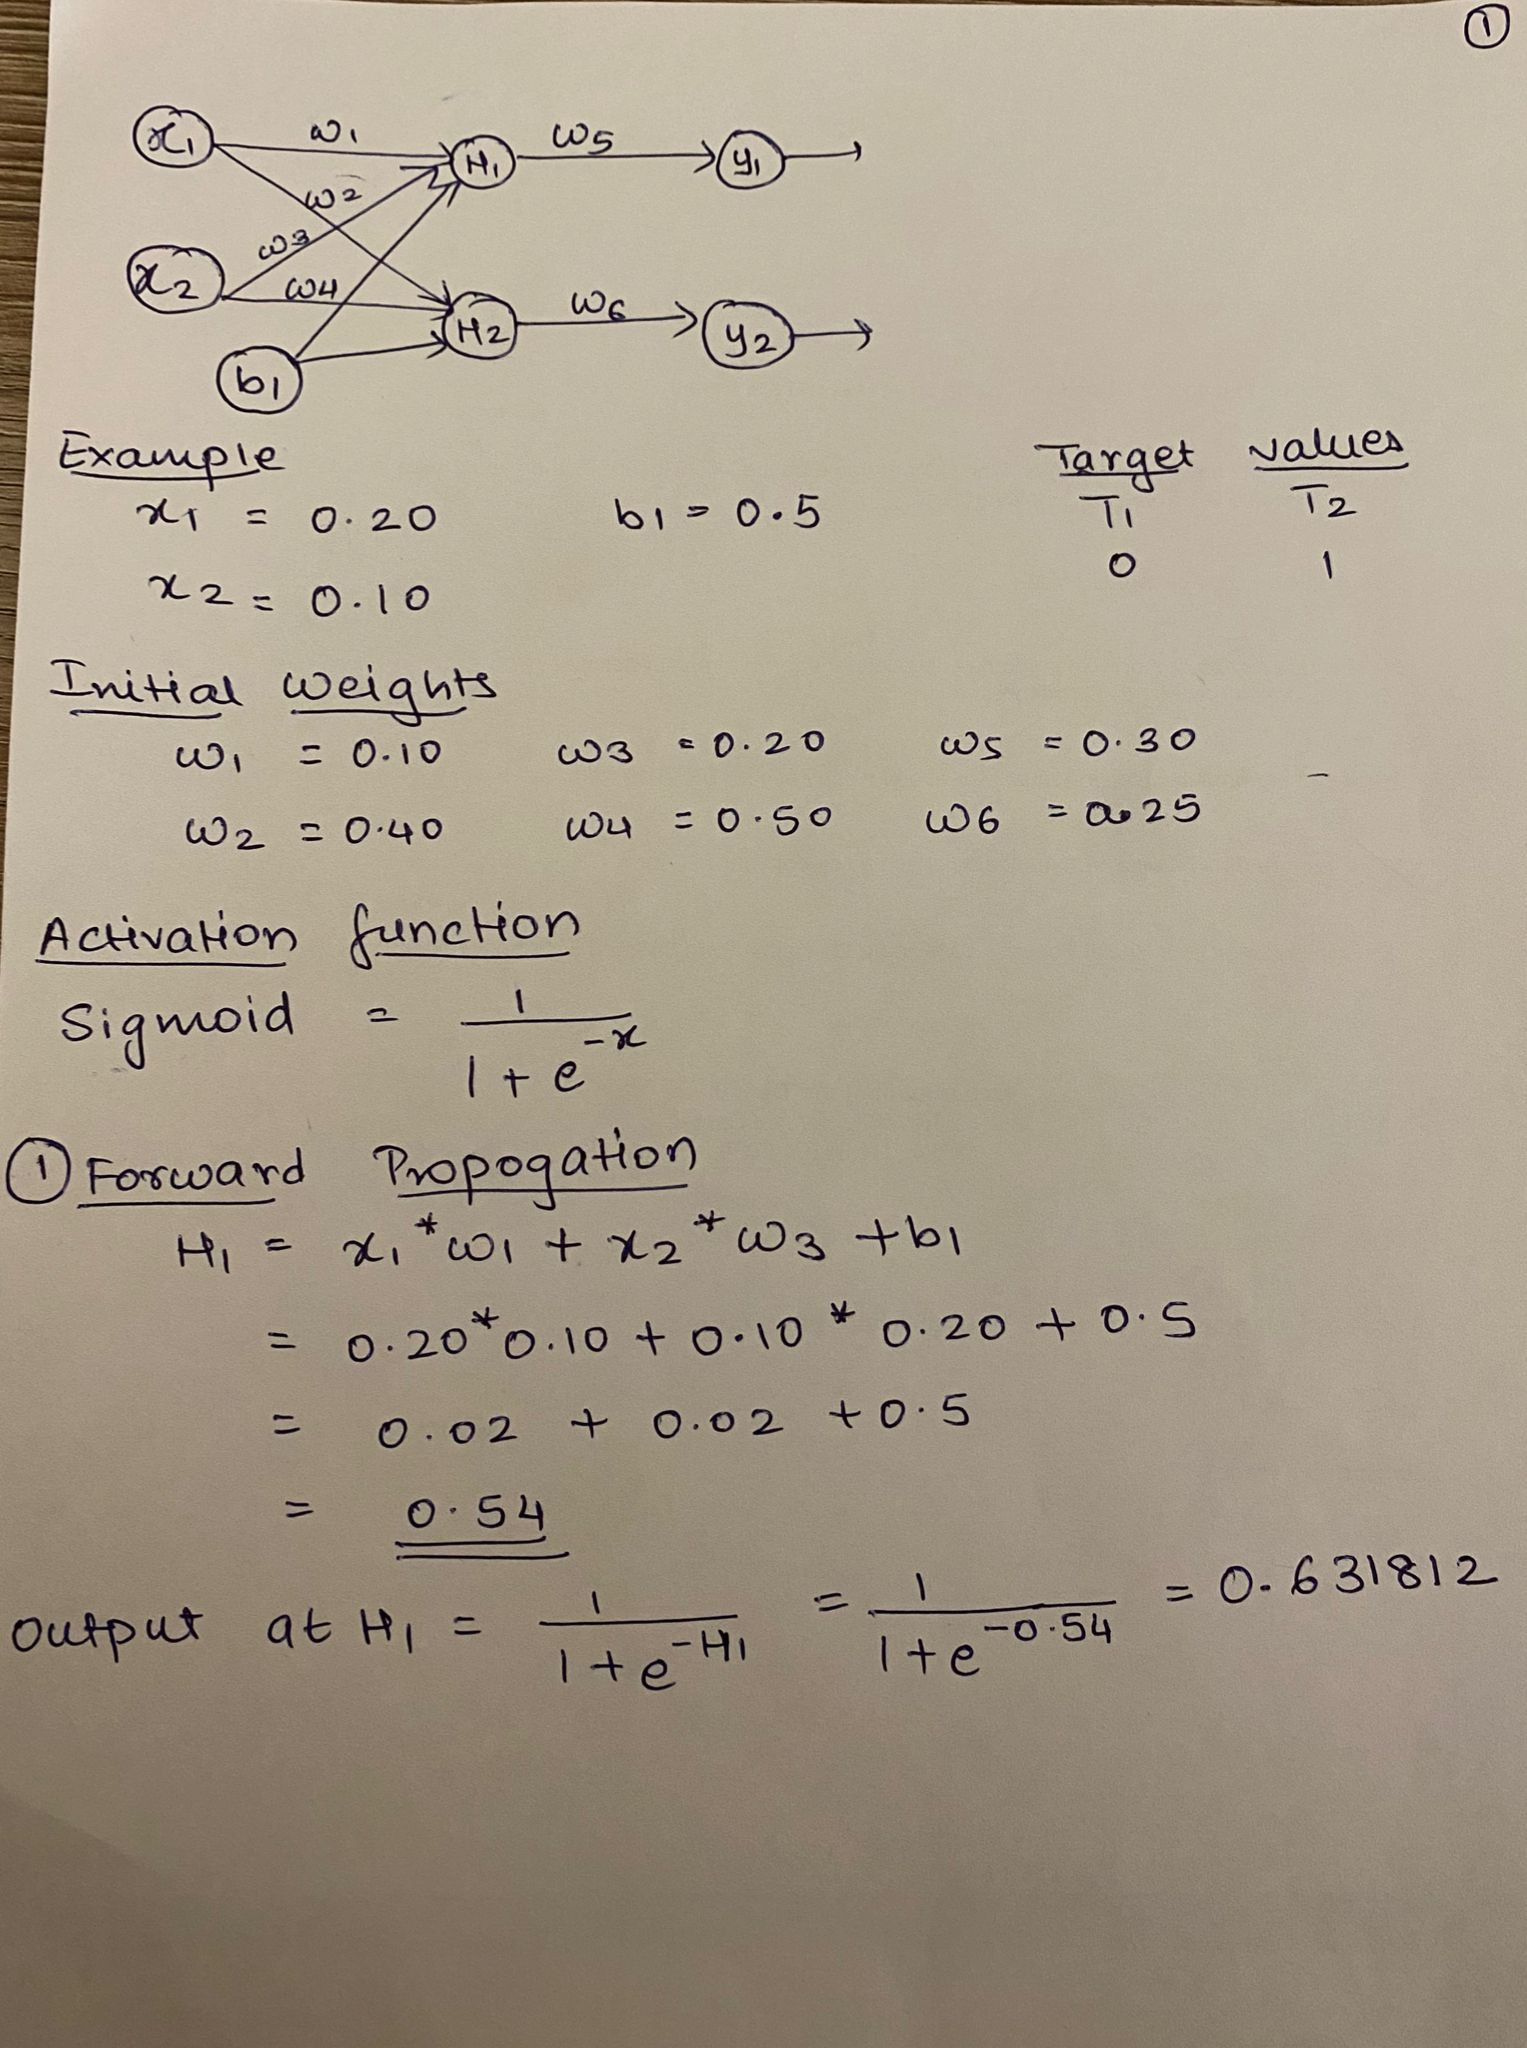

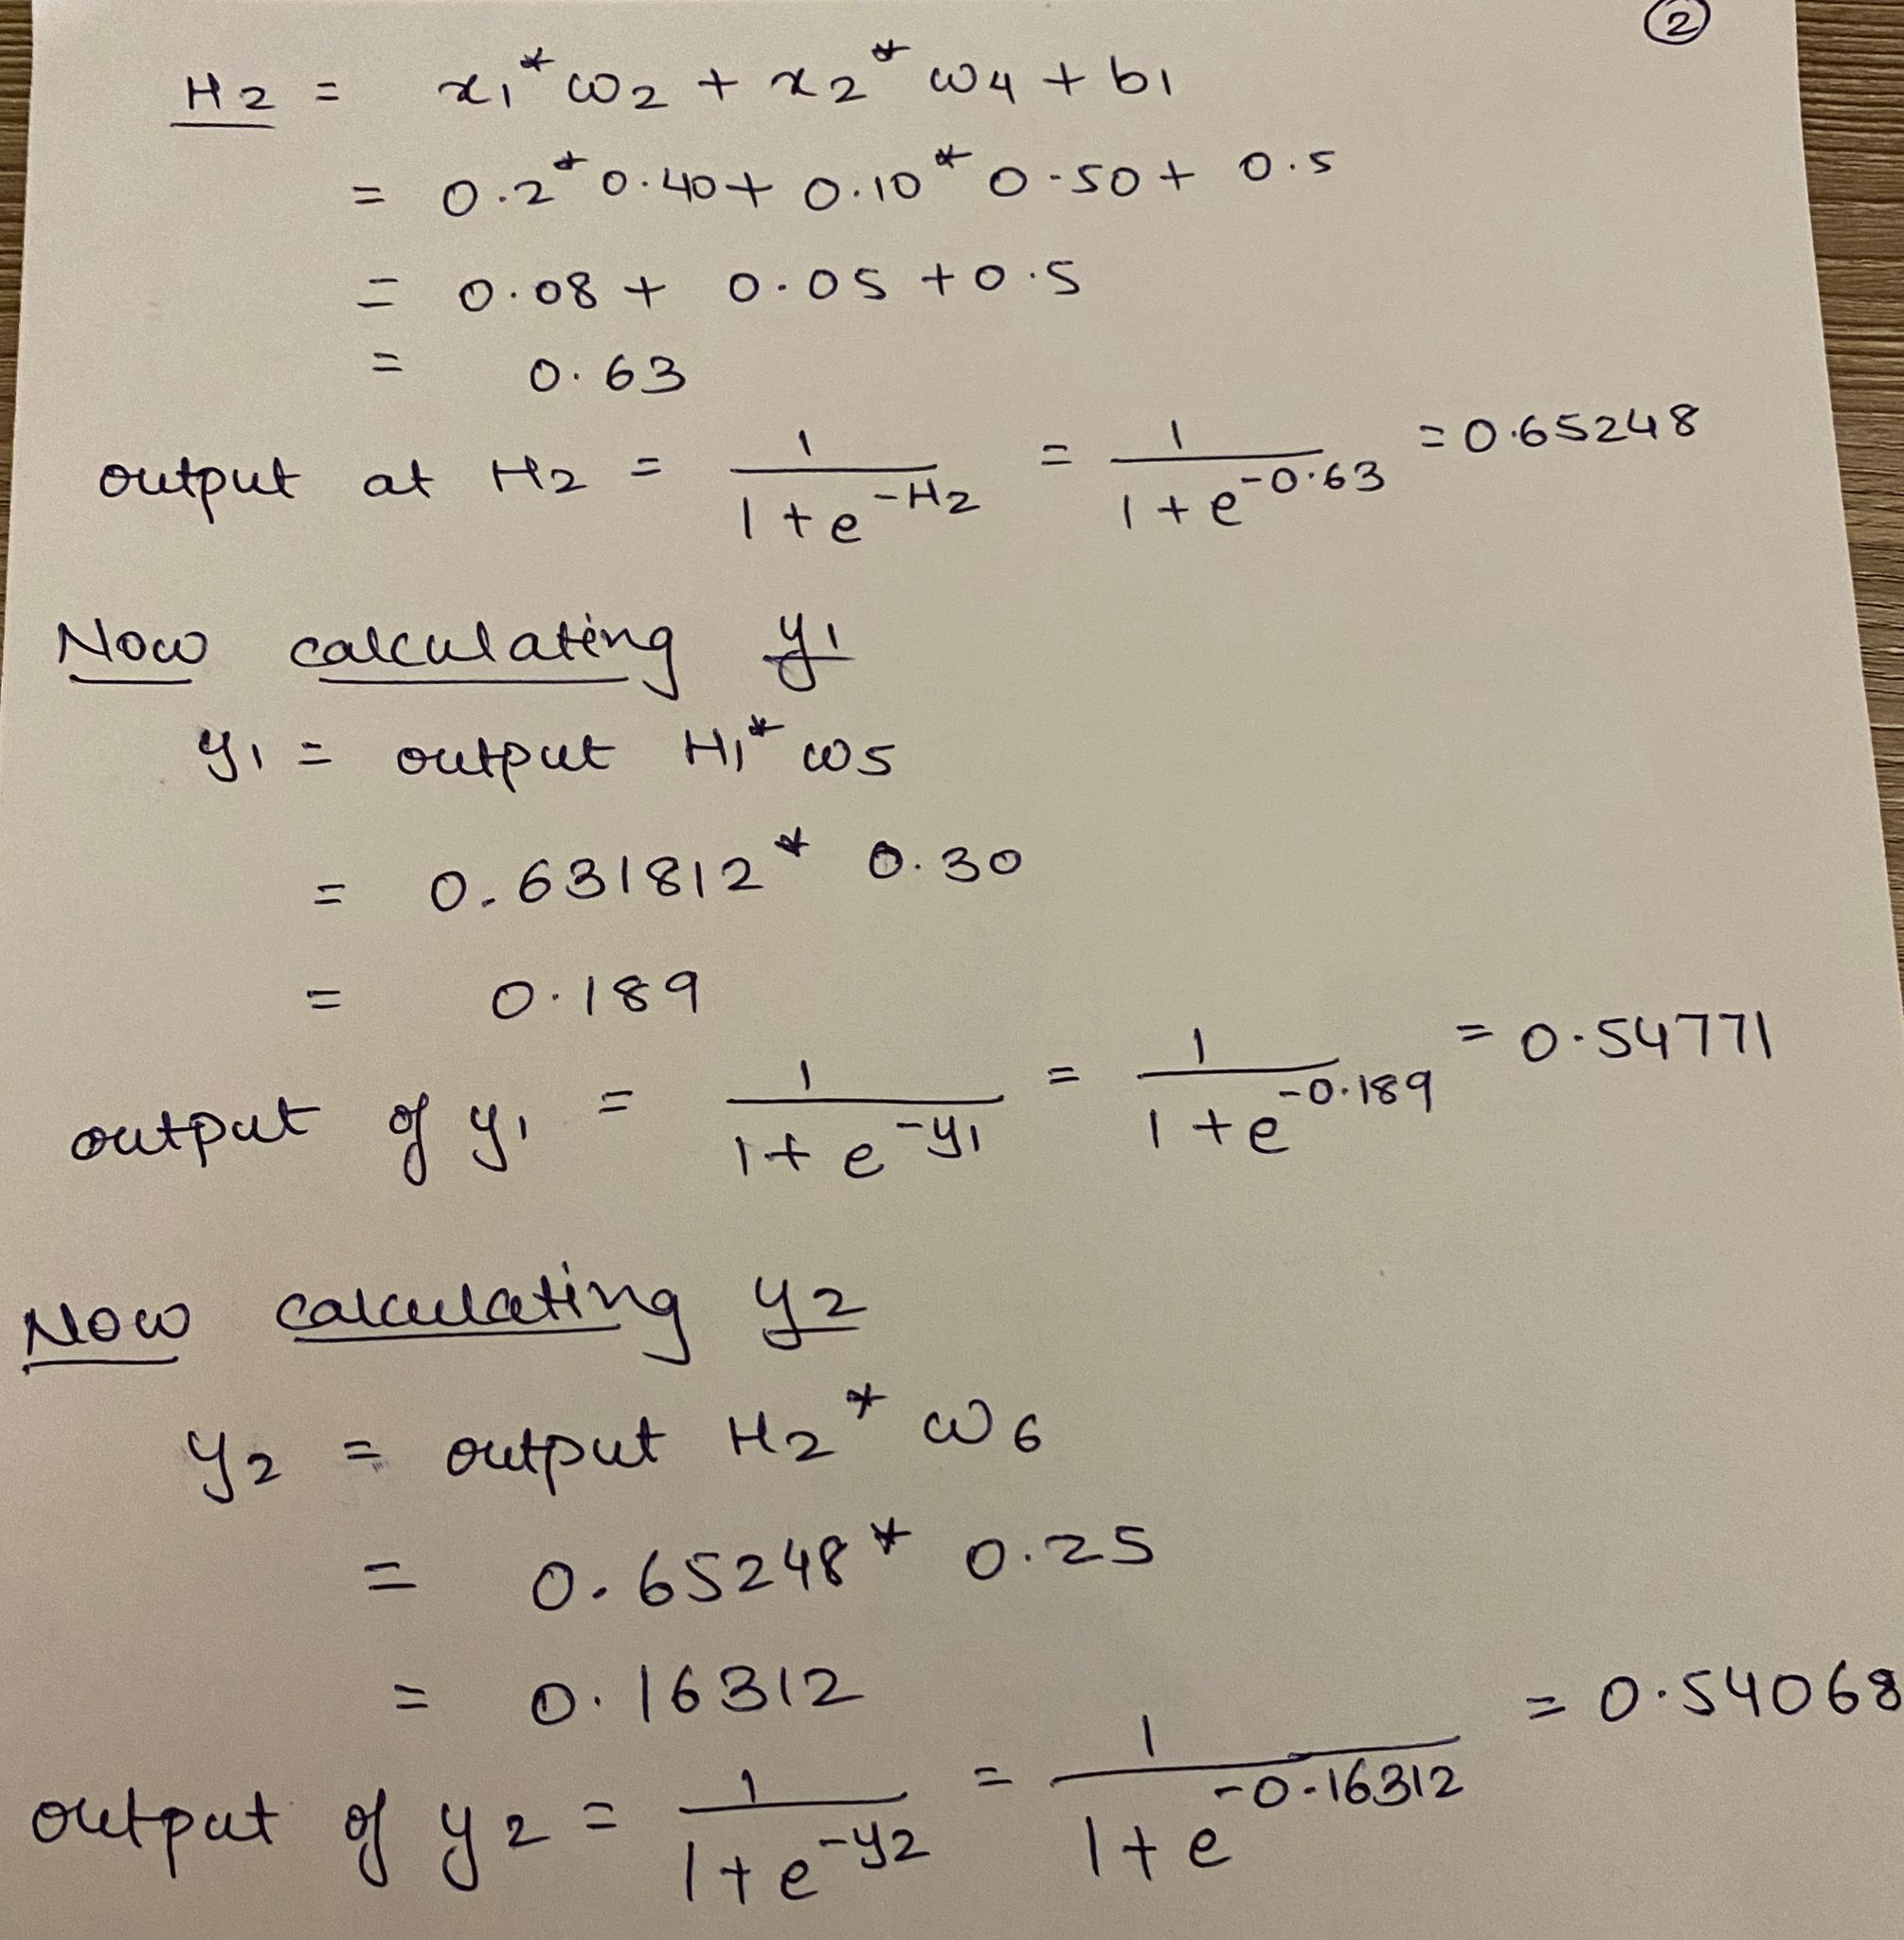

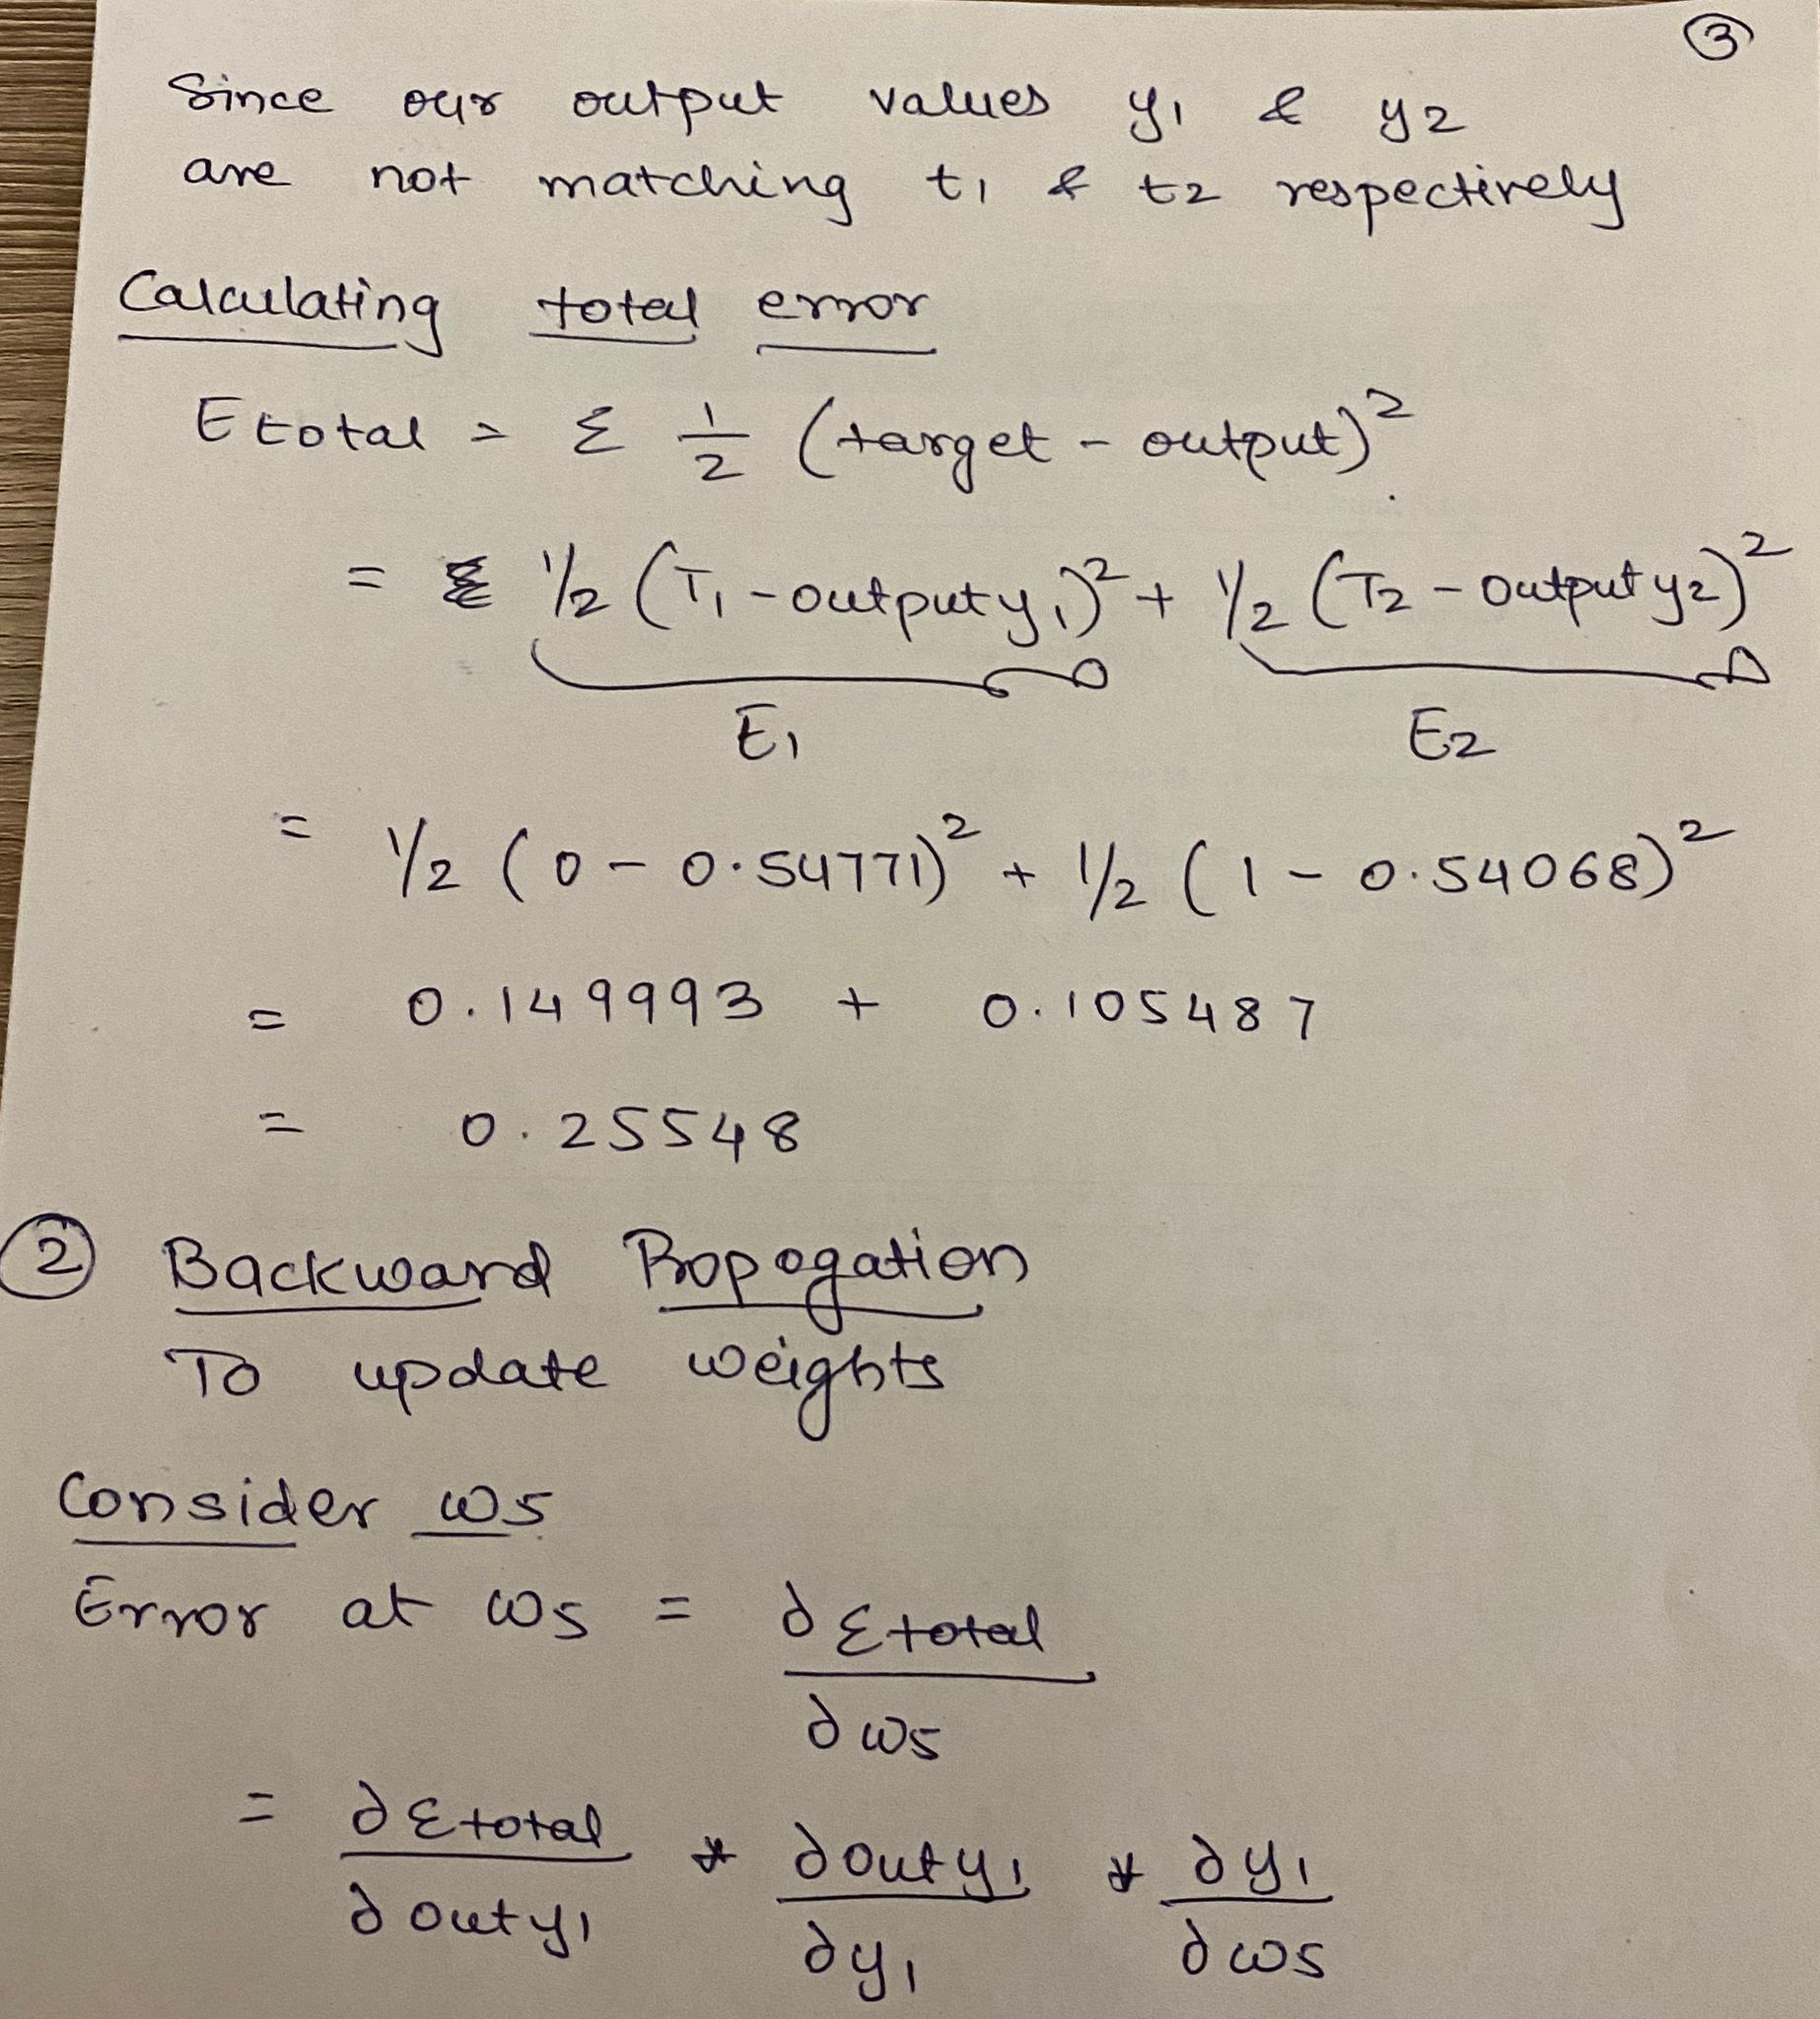

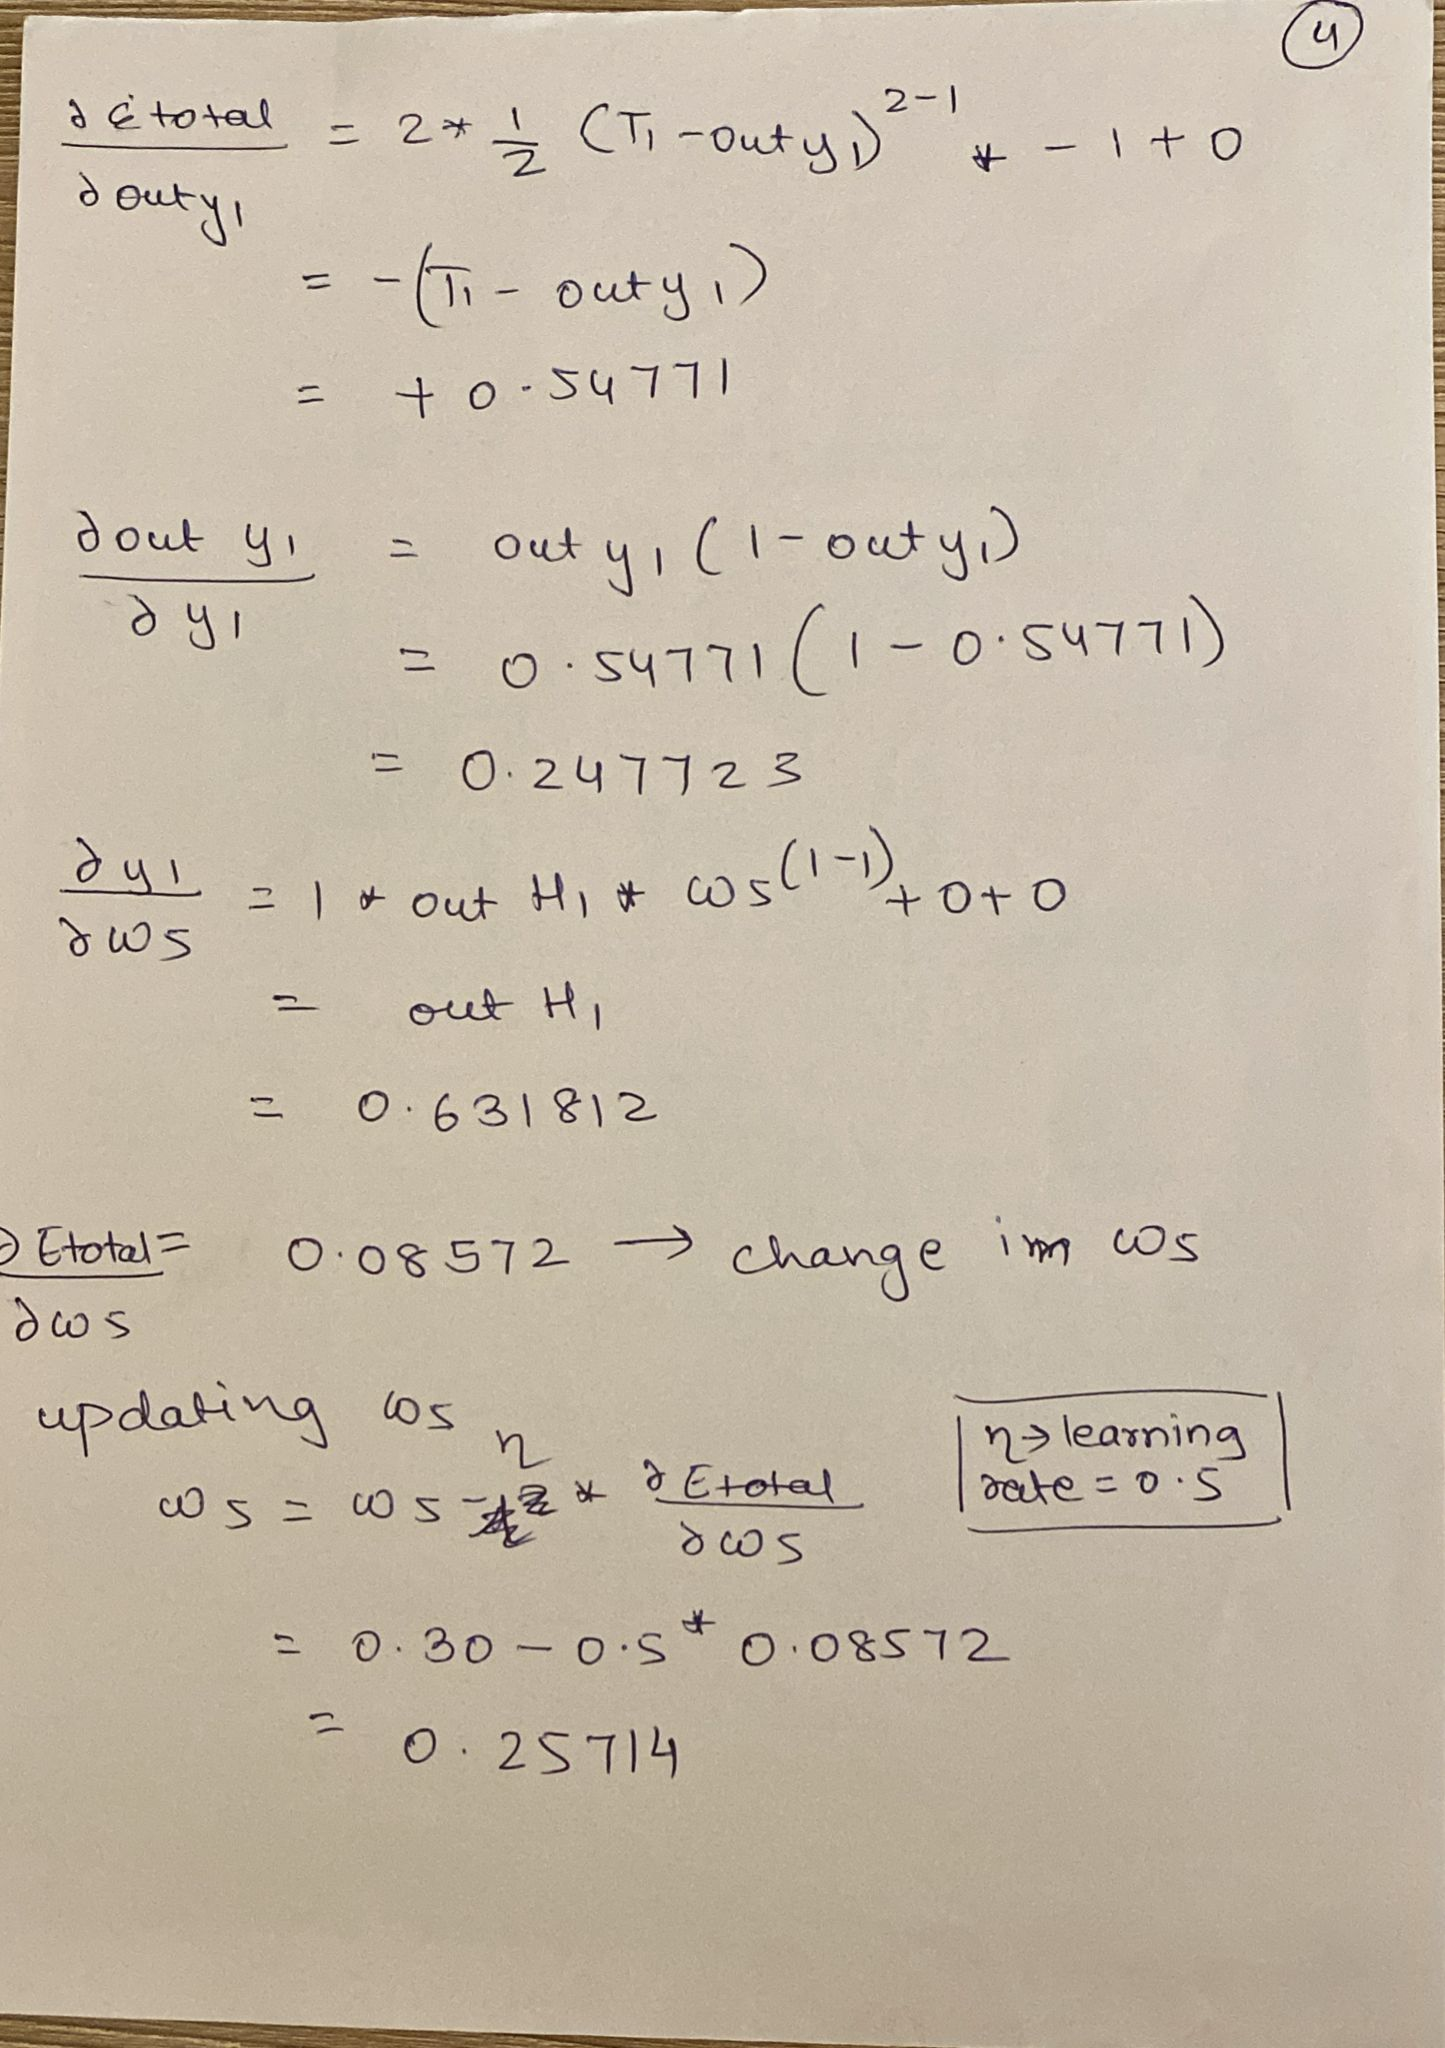

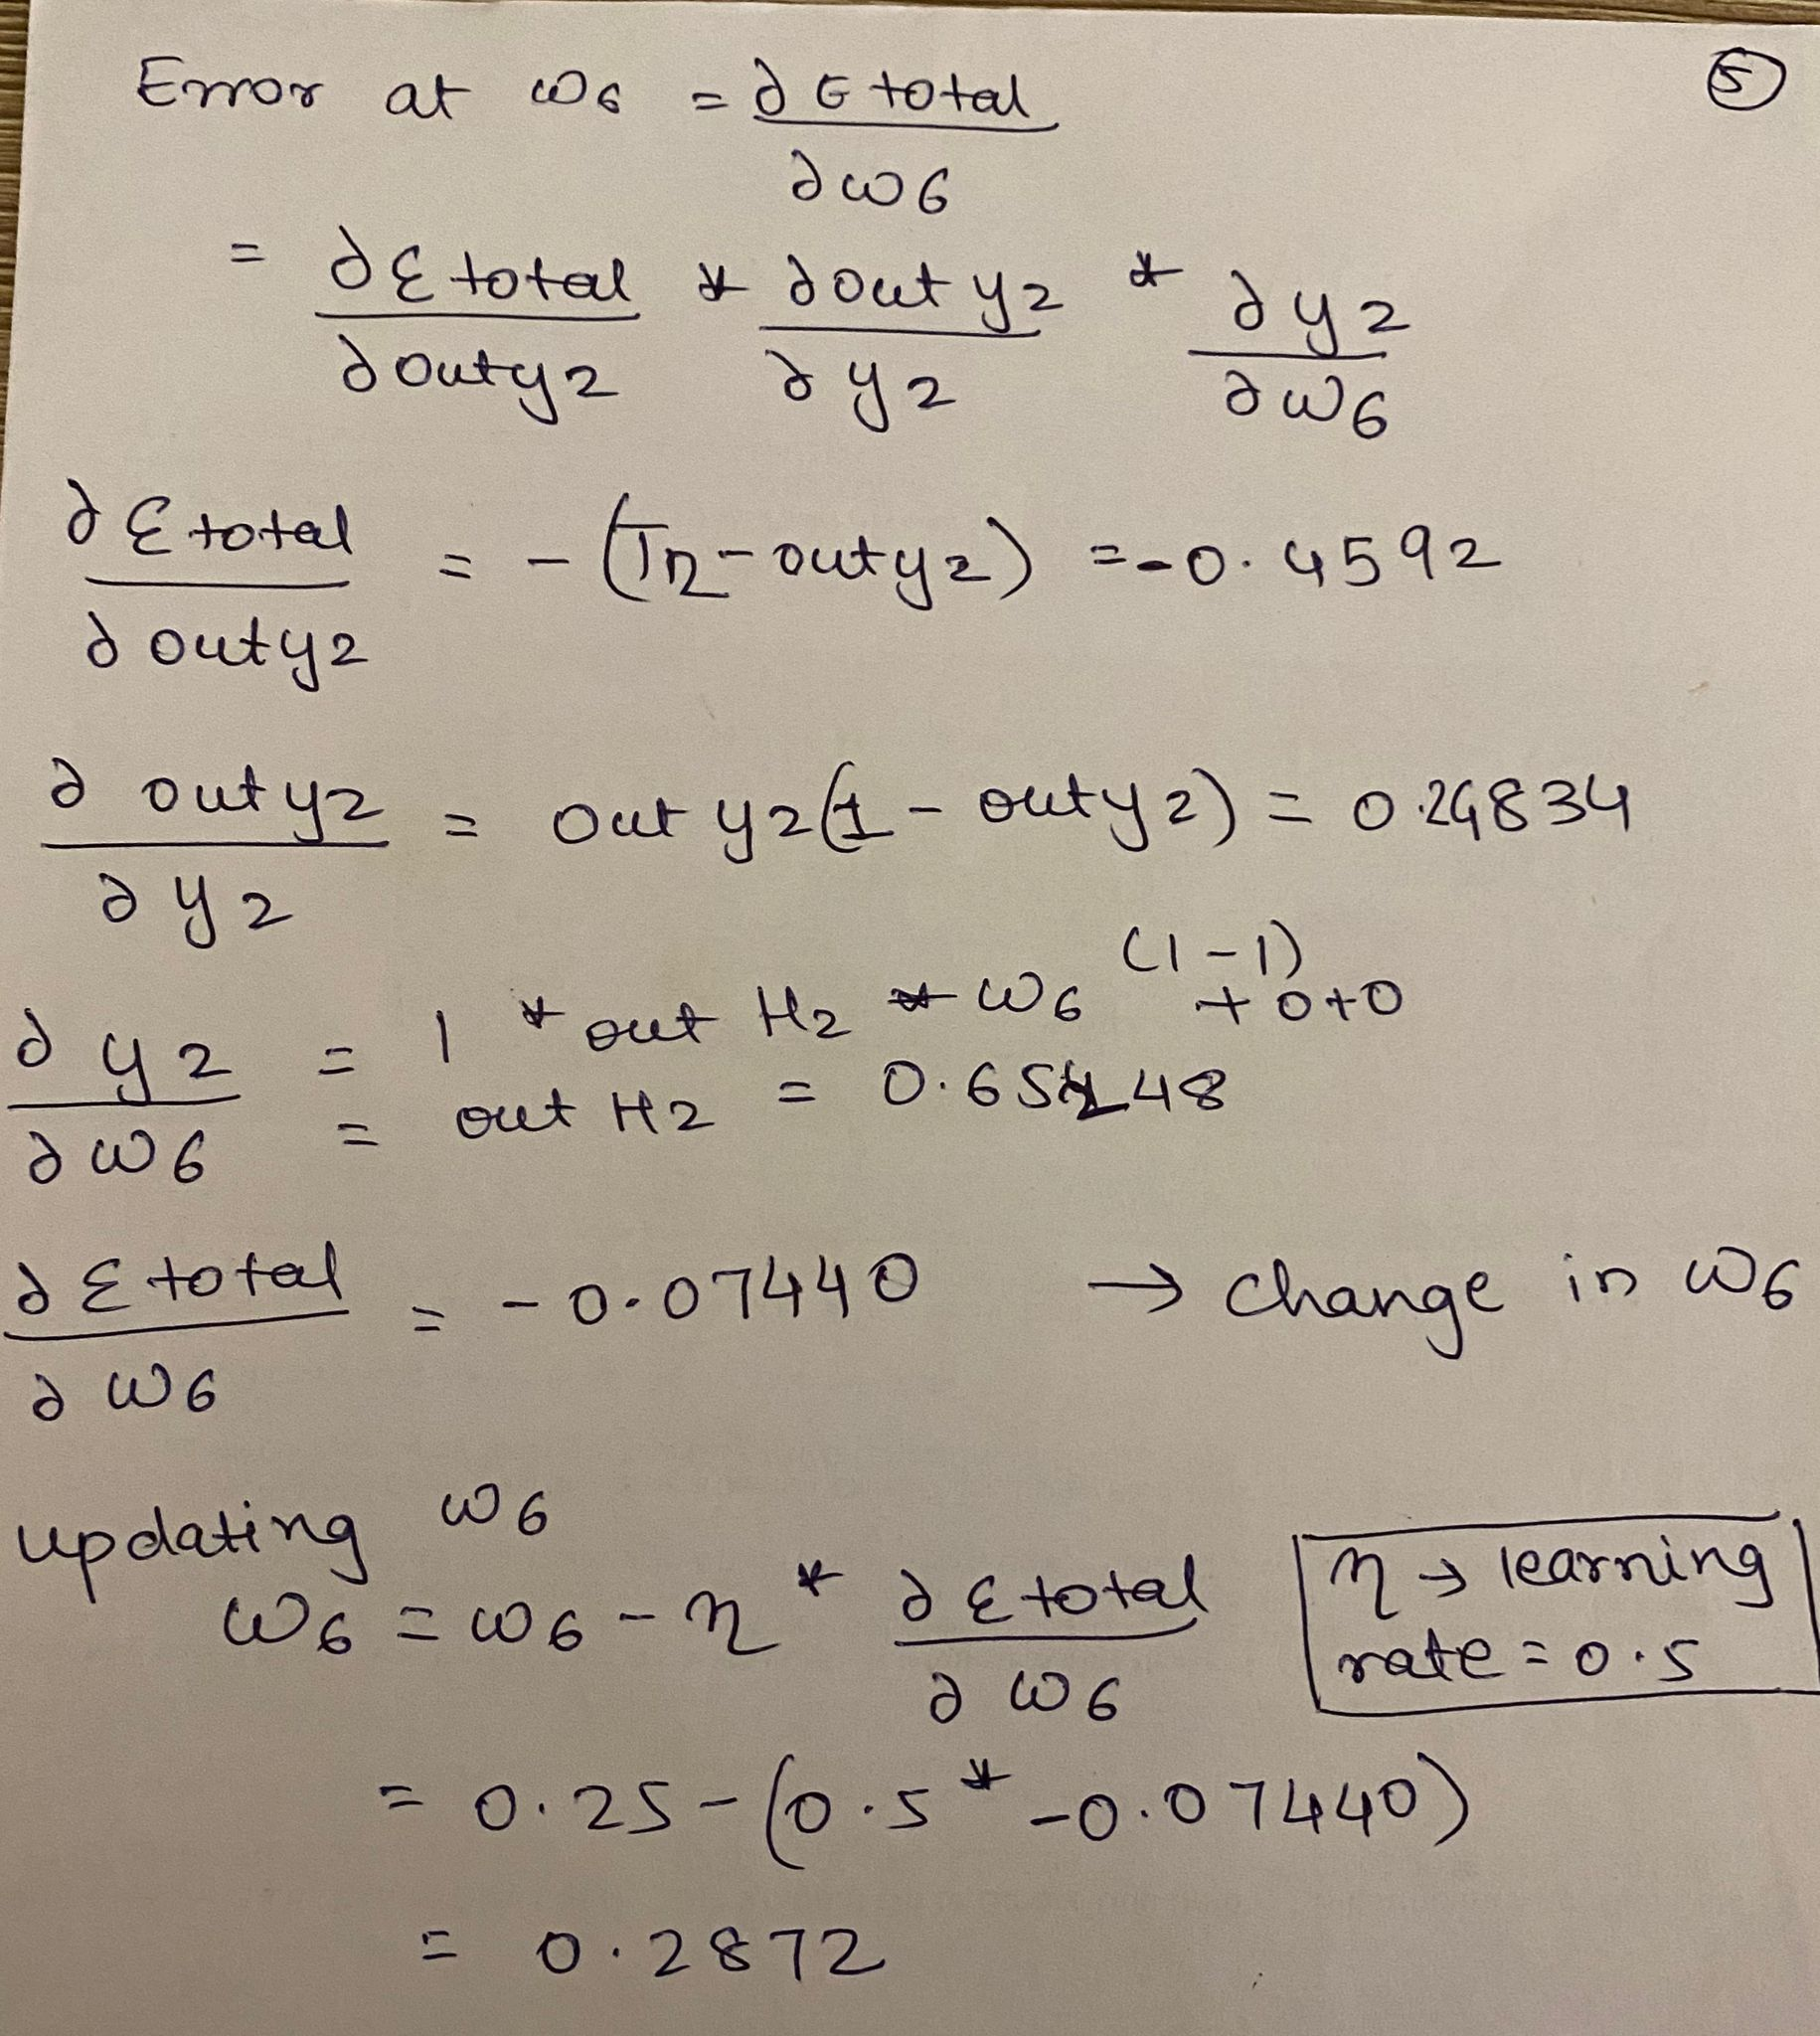

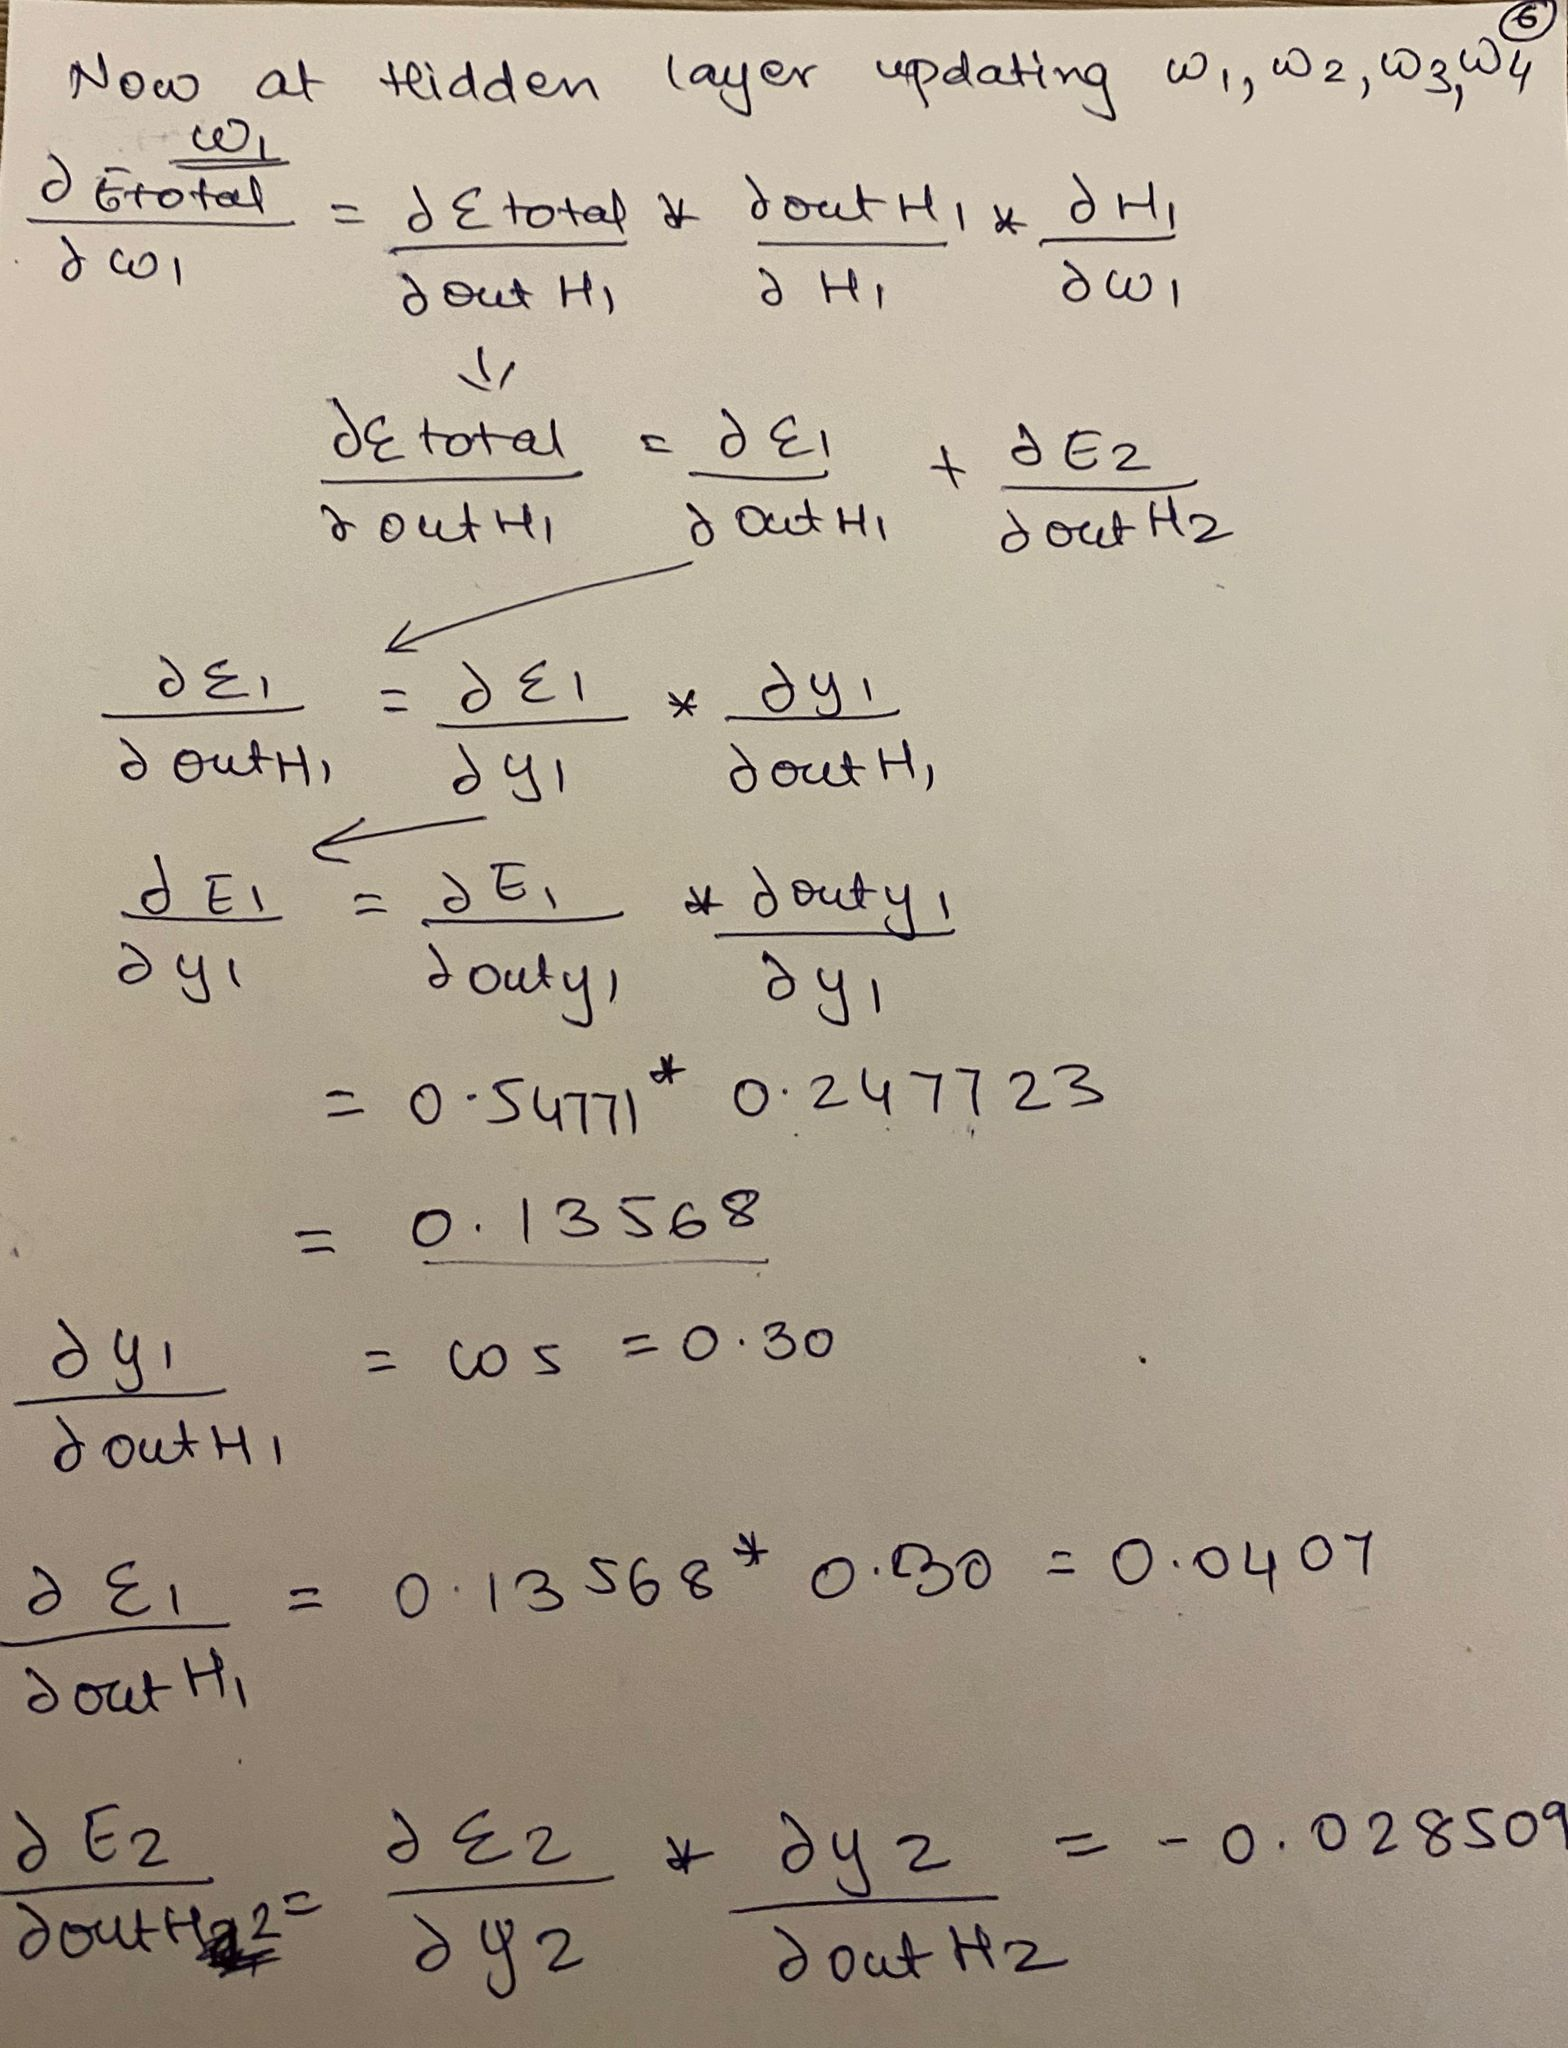

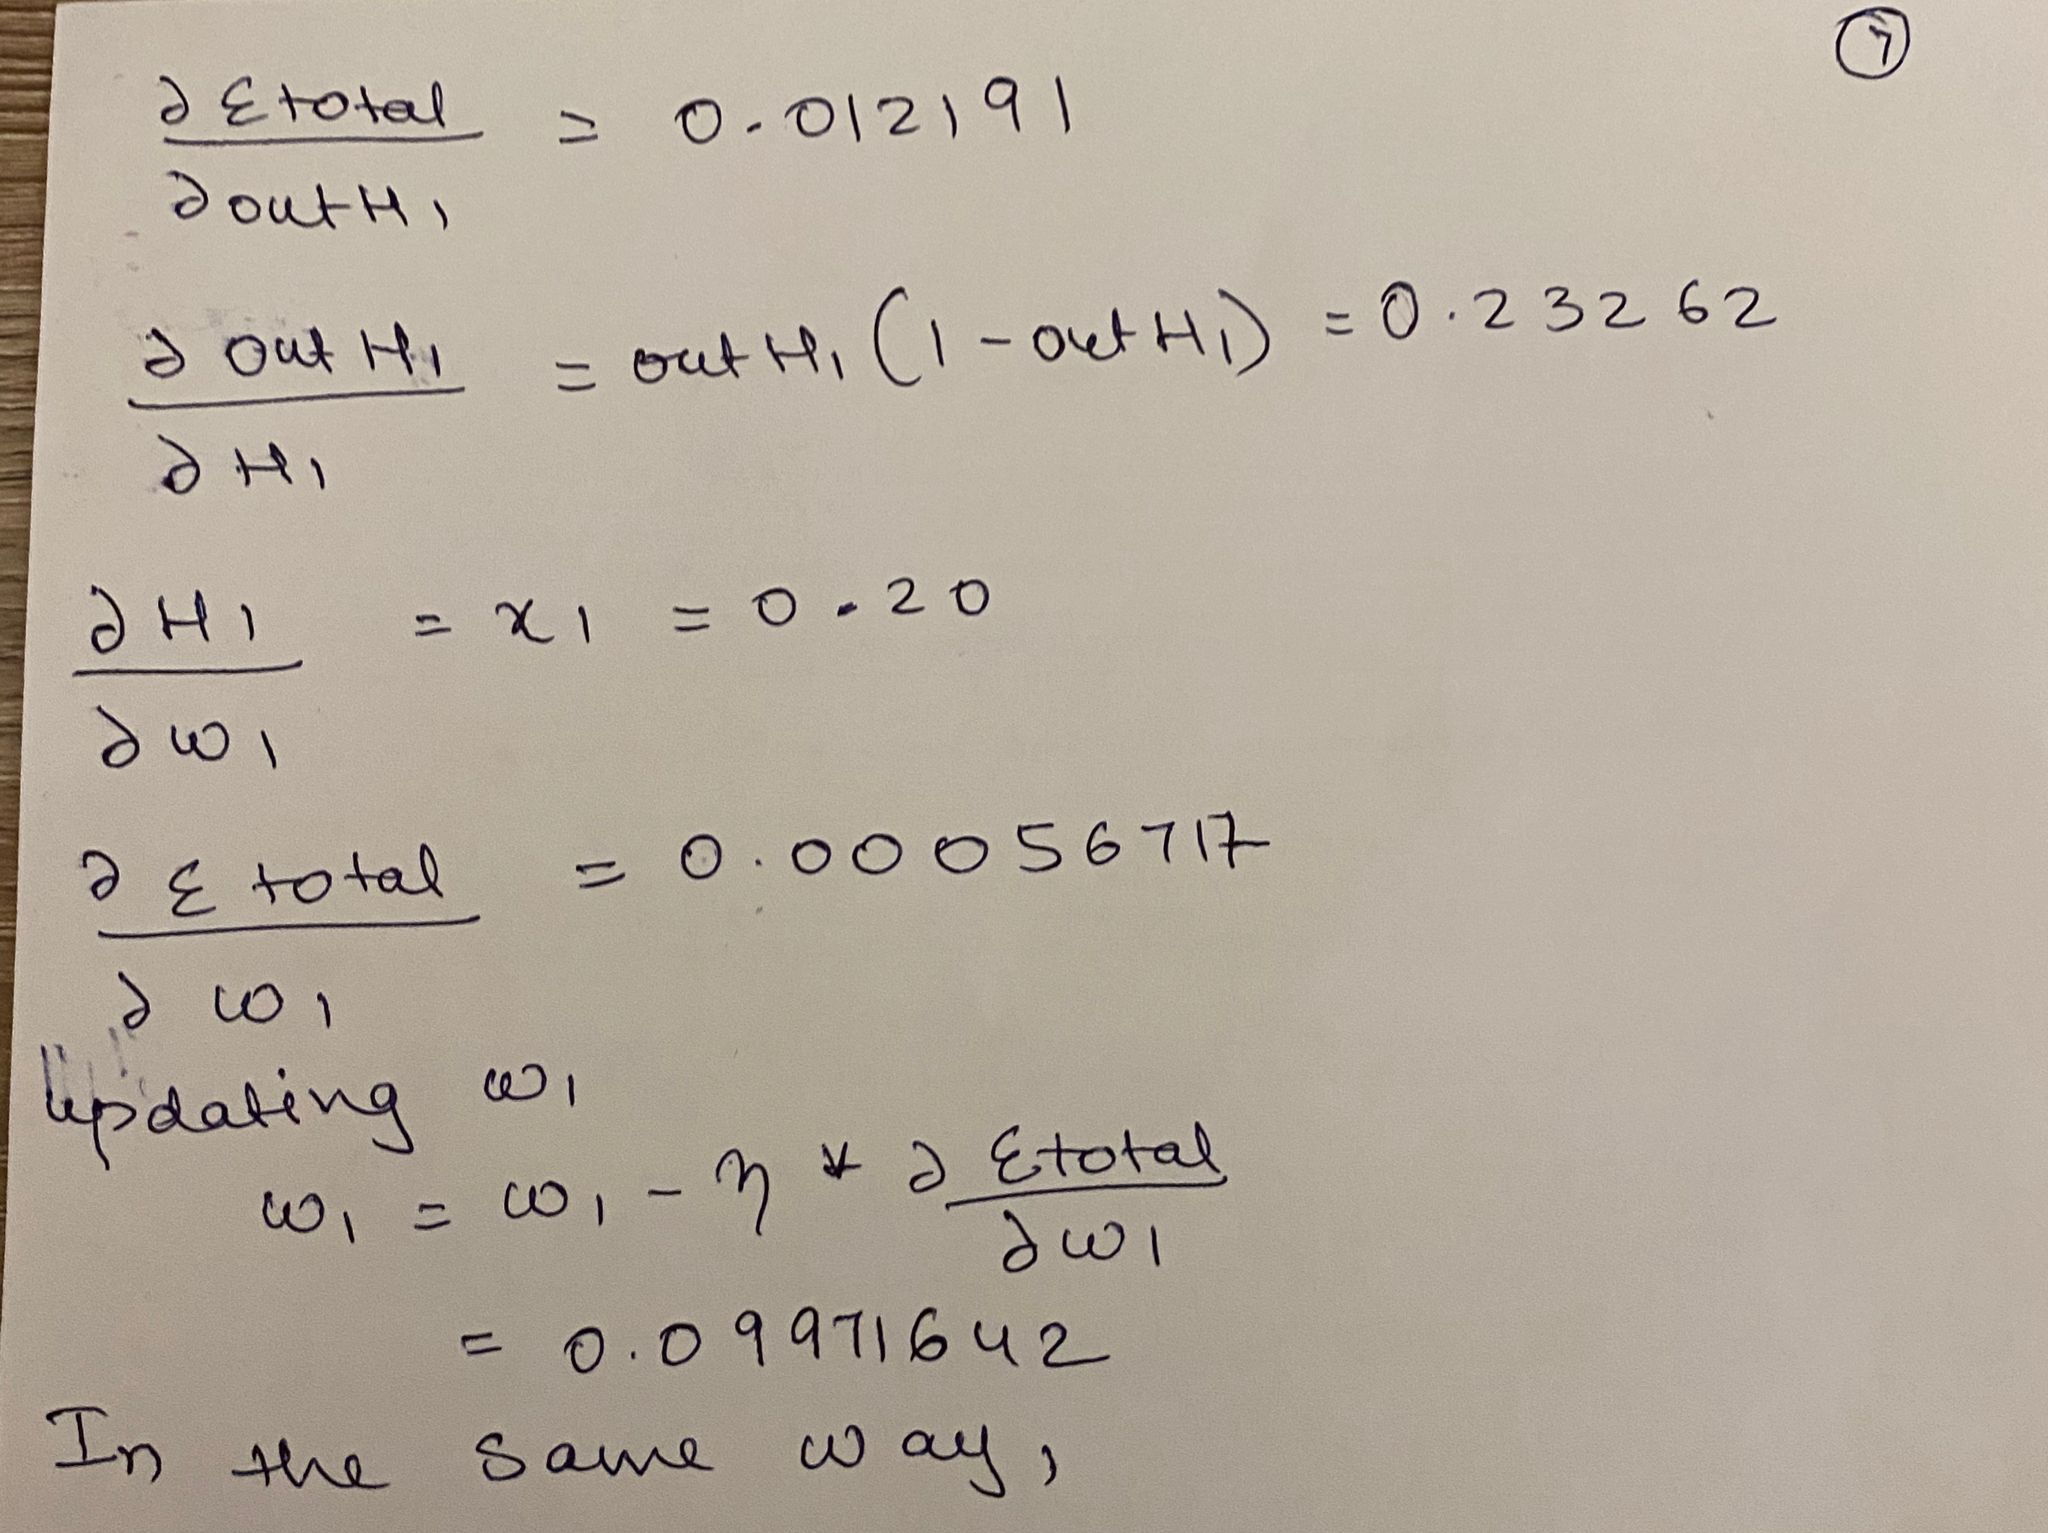

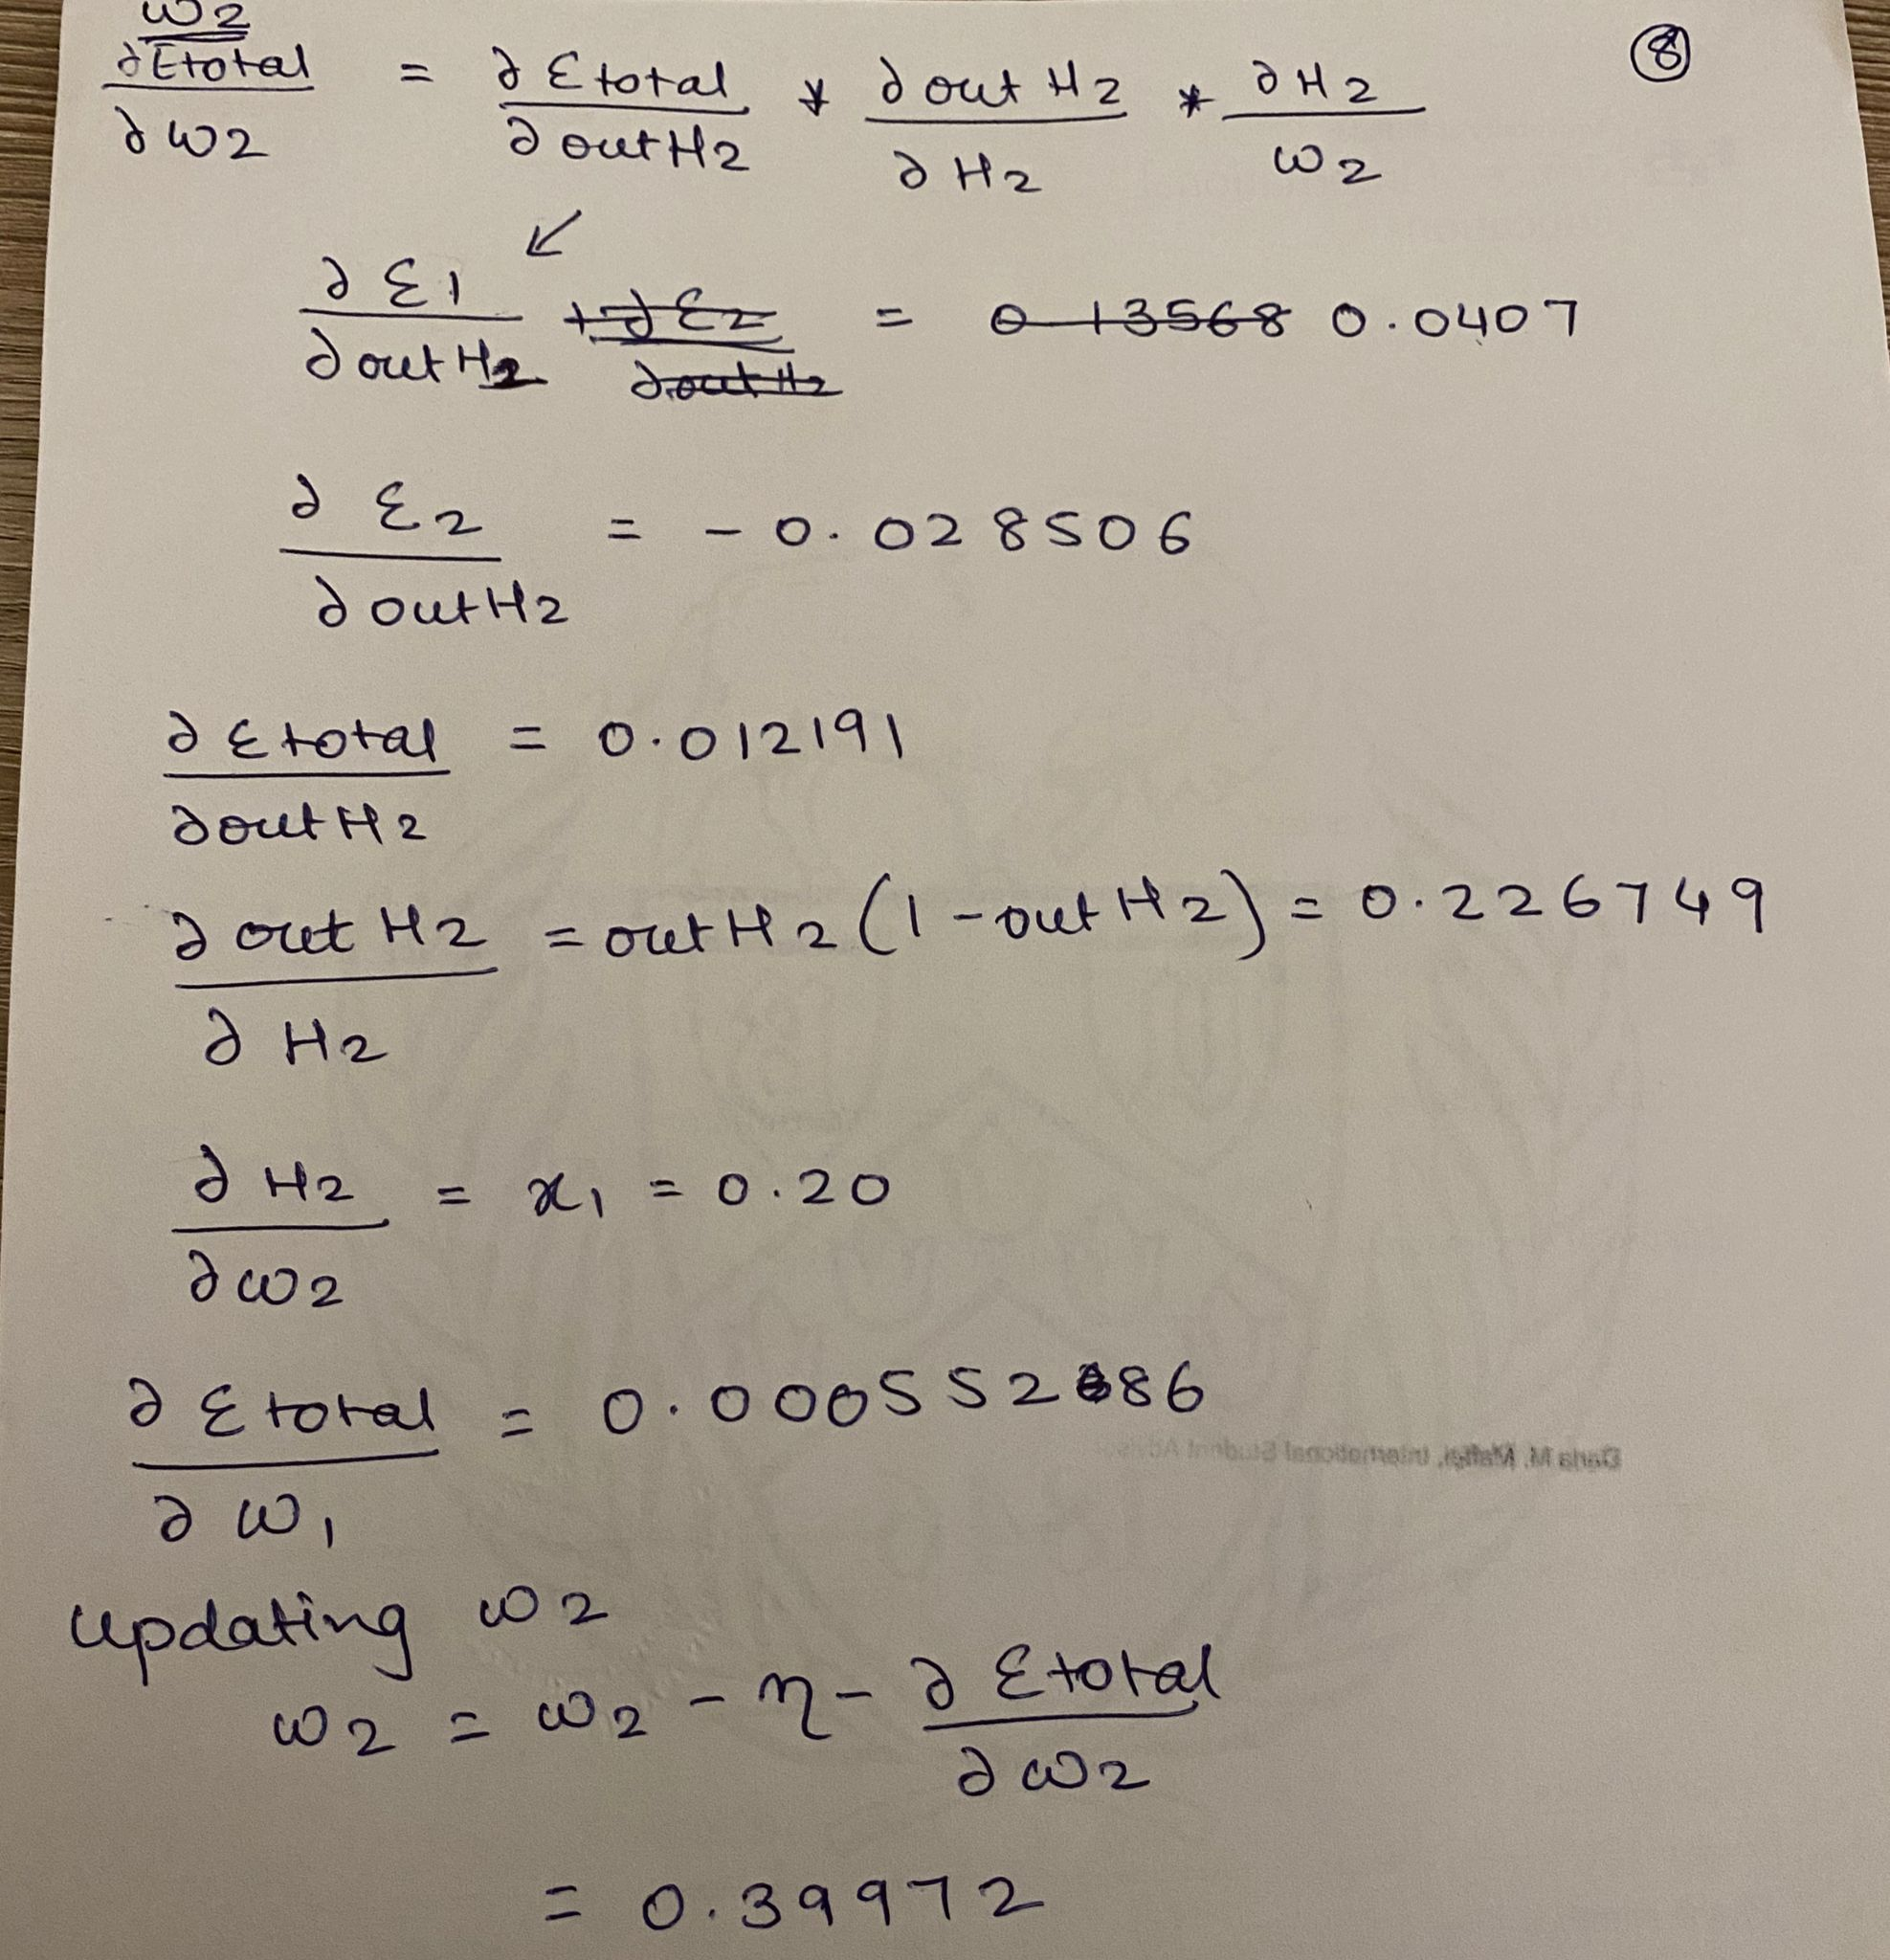

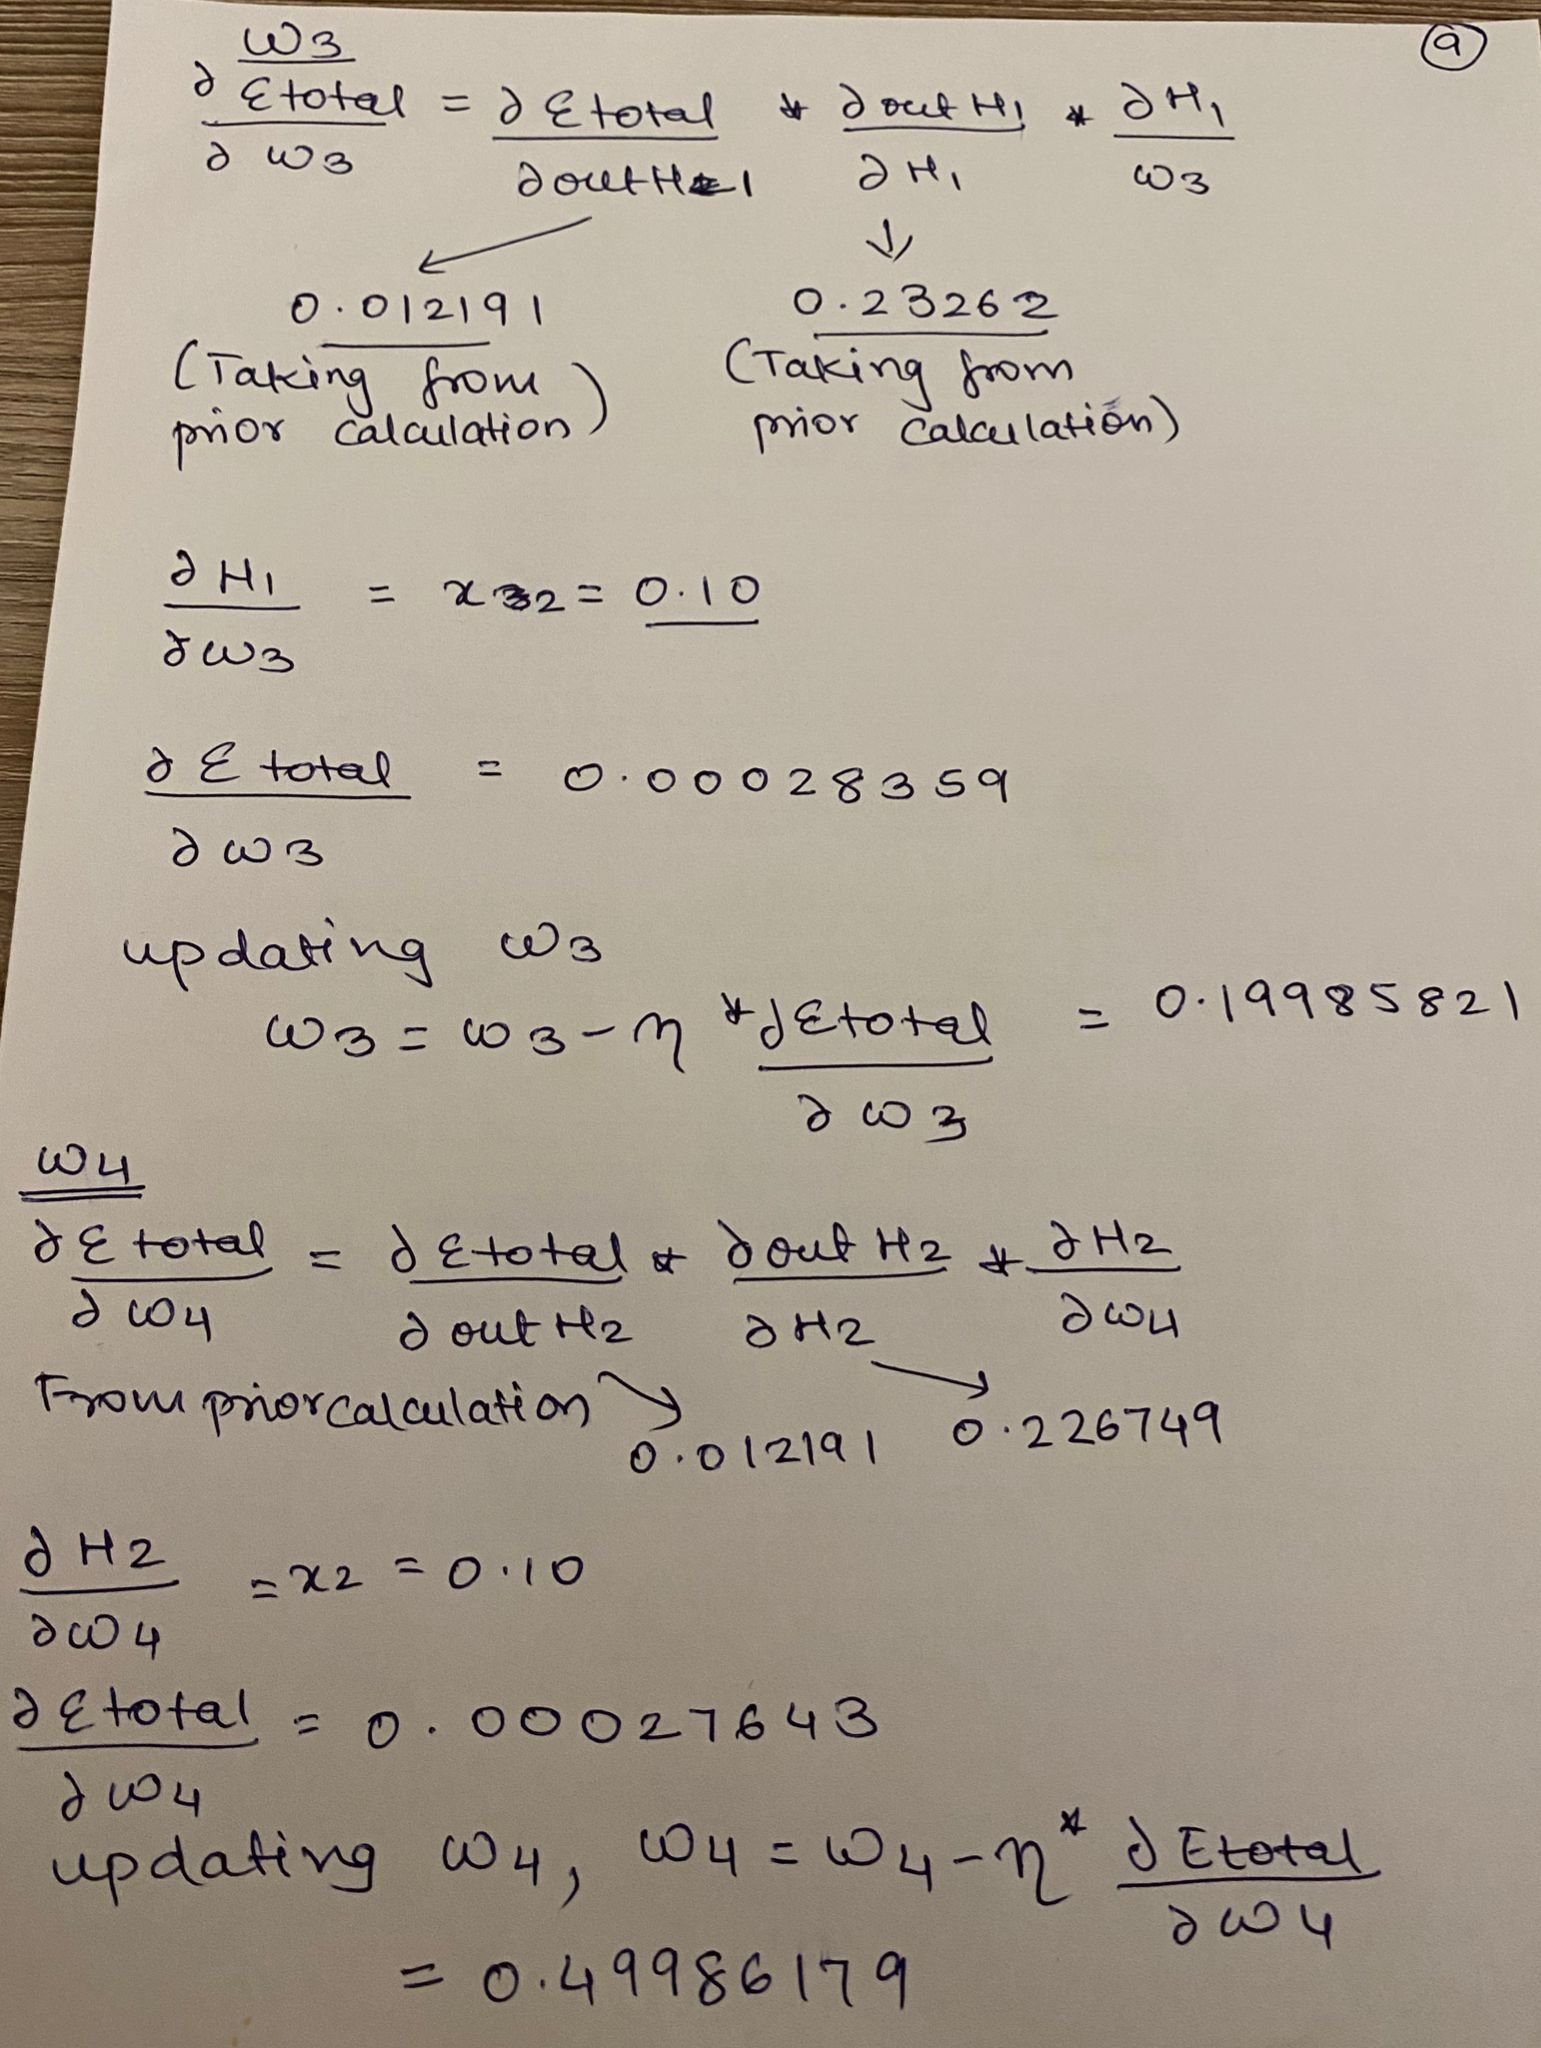

Github Link:

https://github.com/daminivichare66/DeepLearning/blob/main/DaminiPrashant_Vichare_HW_2.ipynb 